In [1]:
import pandas as pd
from pathlib import Path

from classifier.training.utils import set_seed
from notebooks.notebook_utils import plot_label_dist

set_seed(42)

SRC_DATASET_ROOT = Path('./fn-content-dataset')
SRC_DATASET_NAME = 'images__actions.parquet'

In [2]:
df = pd.read_parquet(SRC_DATASET_NAME)
df

,file_name,69,anal_fucking,ass_licking,ass_penetration,fingering,grabbing_ass,grabbing_boobs,grabbing_hair/head,handjob,kissing,masturbation,pussy_rubbing,vaginal_fucking,vaginal_penetration,vibrating,wet_genitals,blowjob,cum,pussy_licking
1,1.jpg,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0
2,2.jpg,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,3.jpg,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0
4,4.jpg,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,0
5,5.jpg,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625137,625137.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
625138,625138.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
625139,625139.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
625140,625140.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0


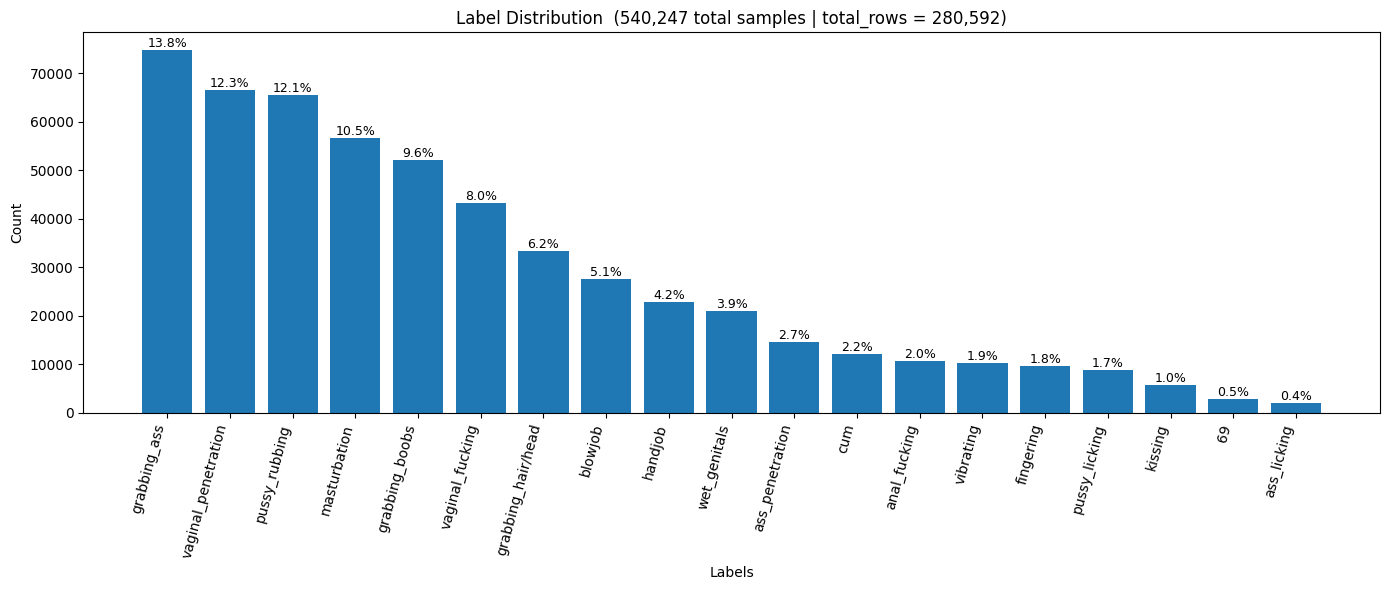

In [3]:
filtered_counts = plot_label_dist(df.drop(['file_name'], axis=1))

In [4]:
df = df.drop(['ass_licking', '69'], axis=1, inplace=False)
df.reset_index(drop=True, inplace=True)
df

,file_name,anal_fucking,ass_penetration,fingering,grabbing_ass,grabbing_boobs,grabbing_hair/head,handjob,kissing,masturbation,pussy_rubbing,vaginal_fucking,vaginal_penetration,vibrating,wet_genitals,blowjob,cum,pussy_licking
0,1.jpg,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0
1,2.jpg,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,3.jpg,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0
3,4.jpg,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,0
4,5.jpg,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280587,625137.jpg,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
280588,625138.jpg,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
280589,625139.jpg,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
280590,625140.jpg,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0


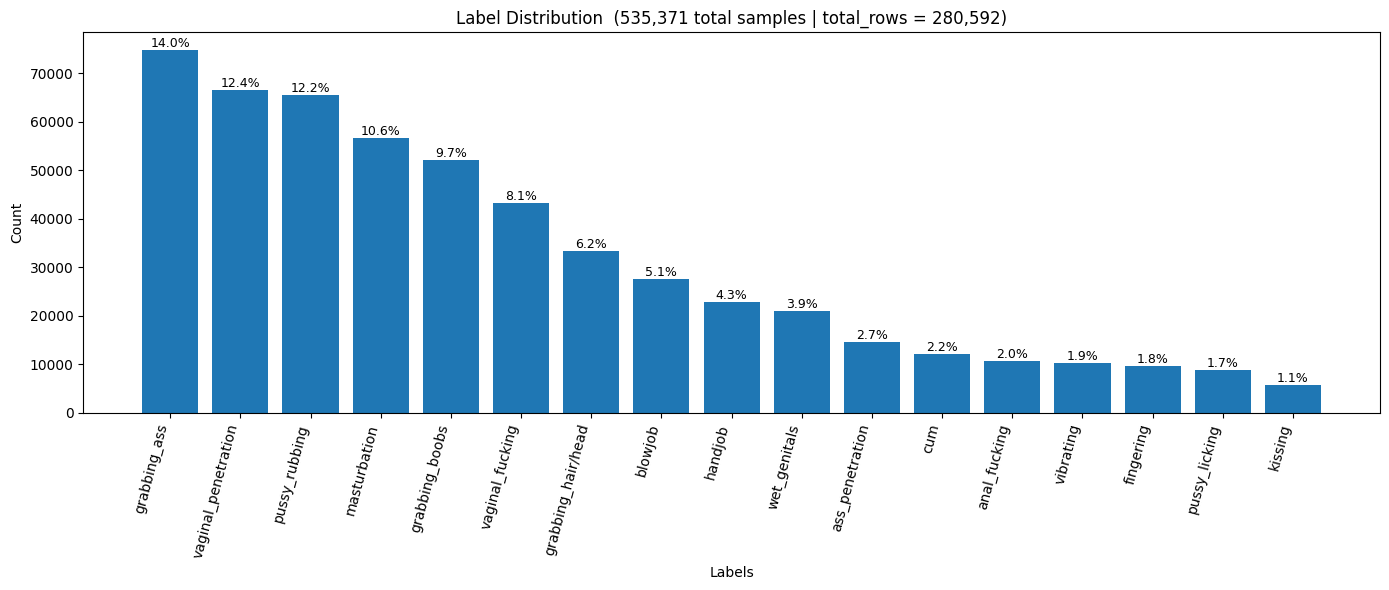

In [5]:
filtered_counts = plot_label_dist(df.drop(['file_name'], axis=1))

In [7]:
majors = ['grabbing_ass', 'vaginal_penetration', 'pussy_rubbing', 'masturbation', 'grabbing_boobs', 'vaginal_fucking', 'grabbing_hair/head', 'blowjob']
actions_major = df[['file_name'] + majors]
actions_minor = df.drop(majors, axis=1, inplace=False)
actions_major.shape, actions_minor.shape

((280592, 9), (280592, 10))

In [8]:
def remove_empty_rows(dataframe: pd.DataFrame):
    non_empty_rows = dataframe.drop(['file_name'], axis=1).sum(axis=1) != 0
    return dataframe.loc[non_empty_rows]

actions_major = remove_empty_rows(actions_major)
actions_minor = remove_empty_rows(actions_minor)
actions_major.shape, actions_minor.shape

((256047, 9), (89193, 10))

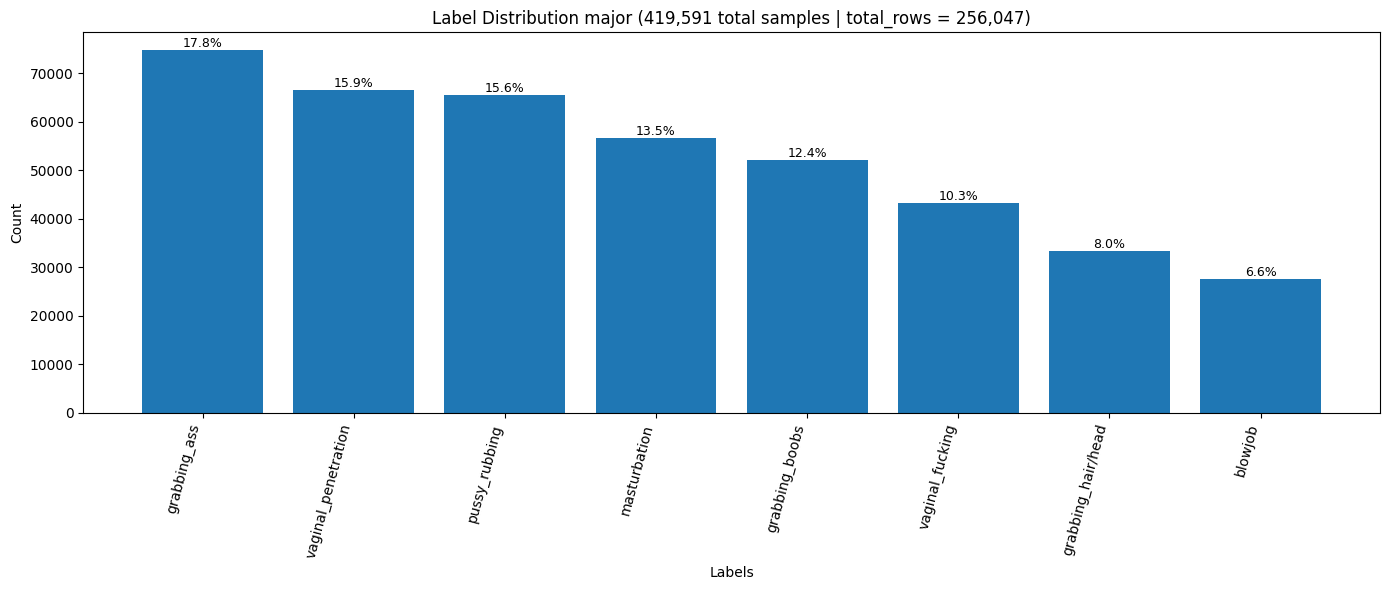

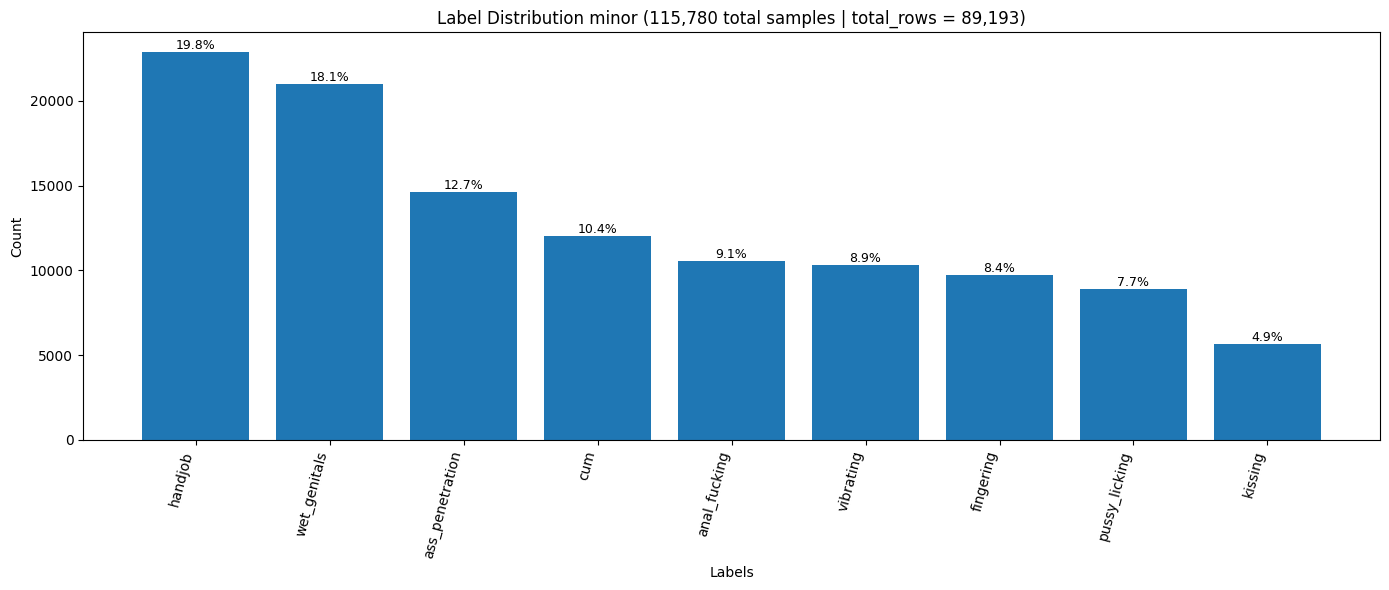

In [9]:
_ = plot_label_dist(actions_major, 'major')
_ = plot_label_dist(actions_minor, 'minor')

In [10]:
actions_major.to_parquet('/Users/milosz/Projects/fn-classifier-final/datasets/actions_major_dataset.parquet')
actions_minor.to_parquet('/Users/milosz/Projects/fn-classifier-final/datasets/actions_minor_dataset.parquet')